In [4]:
pip install matplotlib numpy pandas seaborn torch pyod scikit-learn

  Using cached pandas-2.2.1-cp310-cp310-win_amd64.whl (11.6 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached pyod-1.1.3.tar.gz (160 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
      --------------------------------------- 0.3/10.6 MB 7.9 MB/s eta 0:00:02
     -- ------------------------------------- 0.6/10.6 MB 6.5 MB/s eta 0:00:02
     --- ------------------------------------ 0.9/10.6 MB 8.3 MB/s eta 0:00:02
     ---- ----------------------------------- 1.3/10.6 MB 7.4 MB/s eta 0:00:02
     ------ --------------------------------- 1.7/10.6 MB 7.7 MB/s eta 0:00:02
     ------- -------------------------------- 2.0/10.6 MB 7.7 MB/s eta 0:00:02
     --------- ------------------------------ 2.4/10.6 MB 7.7 MB/s eta 0:00:02
     ---------- ----------------------------- 2.8/10.6 MB 7.8 MB/s eta 0:00:02
     ------------ --------------

  DEPRECATION: pyod is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\danie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


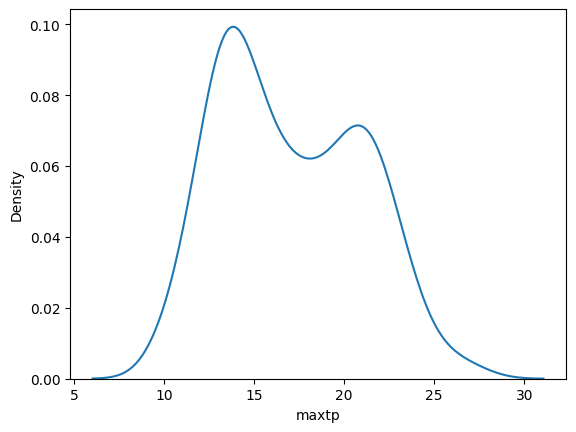

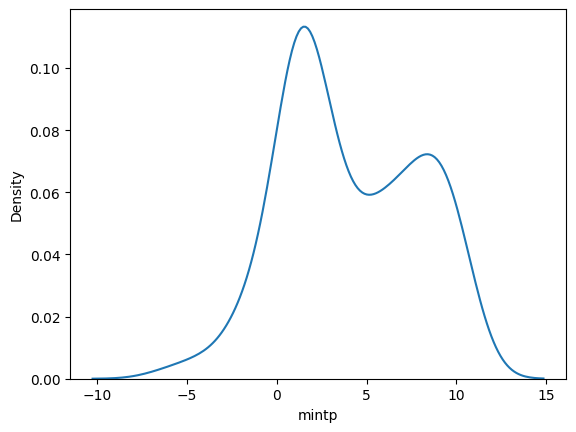

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch


# Comment: First, we will do some data analysis on Irish data.



# Input data
ireland_weather_data = pd.read_csv('C:/Users/danie/Desktop/csv.csv')


# Seaborn pairplots

sns.pairplot(ireland_weather_data, x_vars=['meant'], y_vars=['year','month'])
plt.show()

# # Comment: The mean temperature for this weather station for the period 2005 - 2025 (based on forecasts)
# # seems to vary around the 0 - 17.8 degrees Celsius
# ## However, a very predictable monthly pattern for the same period is occurring
# ## There is a clear skew towards higher temperatures at the end of summer

sns.pairplot(ireland_weather_data, x_vars=['maxtp','mintp'], y_vars=['year','month'])
plt.show()

# # Comment: On a monthly basis, there is a far greater variability in maximum temperature
# # than minimum temperature.
# ## On a yearly basis, maximum temperature is slightly skewed to the left while minimum
# ## temperature is slightly skewed to the right.
# ## This indicates a relatively tight temperature range


sns.pairplot(ireland_weather_data, x_vars=['rain'], y_vars=['year','month'])
plt.show()

# # Comment: There has been a linear increase in rainfall since 2005, with some values
# # being less than expected
# ## There is virtually no correlation between current month and amount of rainfall



sns.pairplot(ireland_weather_data, x_vars=['wdsp'], y_vars=['year','month'])
plt.show()

# # Comment: Windspeed is increasingly growing stronger in the period 2005-2025: However, there
# # is no year or month in which wind speed is not increasing beyond the curve of best fit.
# ## On a monthly basis, there is no correlation between the month and wind speed, but the values are
# ## more spaced out than for rainfall.


# # Density Plot
sns.kdeplot(ireland_weather_data['maxtp'])
plt.show()

sns.kdeplot(ireland_weather_data['mintp'])
plt.show()

# Comment: max temperature has twin peaks at 15 degrees (~0.1 of observations) and 22 (~0.07 of observations) degrees celsius.
## min temperature has twin peaks of 2 degrees (>0.1 of observations) and 8 degrees (0.07 of observations) degrees celsius
## The peaks for minimum temperature are flatter indicating a less grouped data set


# Heatmap for correlation matrix

ireland_weather_data['maxtp'] = pd.to_numeric(ireland_weather_data['maxtp'], errors='coerce')
ireland_weather_data['mintp'] = pd.to_numeric(ireland_weather_data['mintp'], errors='coerce')

# Remove any rows with NaN values that may have resulted from conversion
ireland_weather_data.dropna(subset=['maxtp', 'mintp'], inplace=True)

# Create a new DataFrame with just maxtp and mintp for the correlation matrix
temp_data = ireland_weather_data[['maxtp', 'mintp']]

# Generate the heatmap from the correlation matrix of the reduced DataFrame
sns.heatmap(temp_data.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap between Max and Min Temperatures")
plt.show()

# Comment: 85% correlation between maximum and minimum temperatures



In [25]:

import pandas as pd

# Selecting numerical features here as an example
numerical_features = ireland_weather_data[['maxtp','mintp']].values
numerical_features_tensor = torch.tensor(numerical_features, dtype=torch.float64)

# Standardization can also be done with PyTorch
mean = torch.mean(numerical_features_tensor, dim=0)
std = torch.std(numerical_features_tensor, dim=0)
ireland_weather_scaled = (numerical_features_tensor - mean) / std


# Skewness and Kurtosis
print(maxtp Skewness: %f % ireland_weather_data['maxtp'].skew())
print("mintp Skewness: " %f % ireland_weather_data['mintp'].skew())

# Comment: Slight positive skew in max temperature
## Negligible positive skew in min temperature

print("maxtp Kurtosis: " % ireland_weather_data['maxtp'].kurt())
print("mintp Kurtosis: " % ireland_weather_data['mintp'].kurt())

# Comment: Max temperature displays platykurtic kurtosis: There are fewer outliers than a normal distribution, and the peaks are flatter, tails are thinner
## Similiar kurtosis for min temperature

# Z-Score to identify outliers
from scipy.stats import zscore
ireland_weather_data['maxtemp_zscore'] = zscore(ireland_weather_data['maxtp'])
ireland_weather_data['mintemp_zscore'] = zscore(ireland_weather_data['mintp'])

maxtemp_outliers = ireland_weather_data[(ireland_weather_data['maxtemp_zscore'] > 2) | (ireland_weather_data['maxtemp_zscore'] < -2)]
mintemp_outliers = ireland_weather_data[(ireland_weather_data['mintemp_zscore'] > 2) | (ireland_weather_data['mintemp_zscore'] < -2)]

combined_outliers = pd.concat([maxtemp_outliers, mintemp_outliers]).drop_duplicates()


combined_outliers_filtered = combined_outliers[['year', 'month', 'maxtp', 'mintp']]

# Display the combined anomalies for max and min temperatures
print("Combined Anomalies in Maximum and Minimum Temperature:")
print(combined_outliers_filtered)

# Comment: These outlier values have a less than 0.03% chance of occuring (greater than 3 standard deviations)!

maxtp Skewness: 0.294827
mintp Skewness: 0.032260
maxtp Kurtosis: -0.948936
mintp Kurtosis: -0.836137
Combined Anomalies in Maximum and Minimum Temperature:
     year  month  maxtp  mintp
106  2013      7   25.4    9.5
166  2018      7   26.9   10.9
202  2021      7   25.8   10.6
215  2022      8   27.1   10.3
33   2007      6   19.9   -6.4
75   2010     12   10.0   -4.4
161  2018      2   13.6   -4.3
162  2018      3   11.0   -5.4
219  2022     12   12.1   -3.7


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Assuming ireland_weather_data is your DataFrame

# Scale 'maxtp' and 'mintp'
scaler_maxtp = StandardScaler().fit_transform(ireland_weather_data[['maxtp']])
scaler_mintp = StandardScaler().fit_transform(ireland_weather_data[['mintp']])

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01)

# Fit and predict for 'maxtp'
iso_forest.fit(scaler_maxtp)
ireland_weather_data['is_maxtp_outlier'] = iso_forest.predict(scaler_maxtp)

# Fit and predict for 'mintp' using a new instance of the model to avoid overwriting
iso_forest = IsolationForest(contamination=0.01)  # Reinitialize to reset the model
iso_forest.fit(scaler_mintp)
ireland_weather_data['is_mintp_outlier'] = iso_forest.predict(scaler_mintp)

# Filter to find rows marked as outliers for either 'maxtp' or 'mintp'
ireland_outliers = ireland_weather_data[(ireland_weather_data['is_maxtp_outlier'] == -1) | (ireland_weather_data['is_mintp_outlier'] == -1)]

print("Outliers (Using Isolation Forest):")
print(ireland_outliers[['year', 'month', 'maxtp', 'mintp']])

# Comment: Adjusting contamination to 0.01 gave us a similiar number of outlier values


Outliers (Using Isolation Forest):
     year  month  maxtp  mintp
33   2007      6   19.9   -6.4
162  2018      3   11.0   -5.4
166  2018      7   26.9   10.9
202  2021      7   25.8   10.6
215  2022      8   27.1   10.3
219  2022     12   12.1   -3.7


In [42]:
import pandas as pd

# Load the CSV file into a DataFrame
# (Adjust the path as necessary for your environment)
france_weather_data = pd.read_csv('C:/Users/danie/Desktop/NW2016.csv')

# Ensure 'date' is a string
france_weather_data['date'] = france_weather_data['date'].astype(str)

# Extract 'year' and 'month' from the 'date' column
france_weather_data['year'] = france_weather_data['date'].str.slice(0, 4).astype(int)
france_weather_data['month'] = france_weather_data['date'].str.slice(4, 6).astype(int)

# Assuming temperature 't' is in Kelvin and needs to be converted to Celsius
france_weather_data['t'] = france_weather_data['t'] - 273.15

# Generate a numbered list of unique weather stations
station_ids = france_weather_data['number_sta'].unique()
station_id_mapping = {station: idx for idx, station in enumerate(station_ids, start=1)}
france_weather_data['station_id'] = france_weather_data['number_sta'].map(station_id_mapping)

# Calculate the max and min temperatures for each station for each month
temperature_stats = france_weather_data.groupby(['year', 'month', 'station_id'])['t'].agg(max_temp=('t', 'max'), min_temp=('t', 'min')).reset_index()

# Merge the calculated max and min temperatures back into the original DataFrame
france_weather_data = france_weather_data.merge(temperature_stats, on=['year', 'month', 'station_id'], how='left')

# Display the modified DataFrame structure
print(france_weather_data[['year', 'month', 'number_sta', 'station_id', 't', 'max_temp', 'min_temp']].head())



TypeError: func is expected but received tuple in **kwargs.

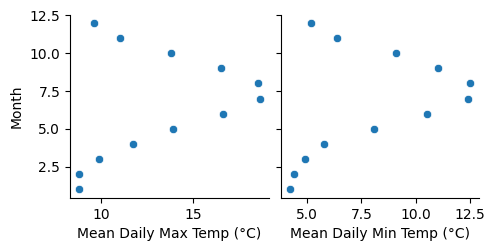

C:\Users\danie\AppData\Local\Temp\ipykernel_16696\2875590236.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(roche_monthly_temps['Mean Daily Max Temp (°C)'], label='Mean Daily Max Temp', shade=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_16696\2875590236.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(roche_monthly_temps['Mean Daily Min Temp (°C)'], label='Mean Daily Min Temp', shade=True)


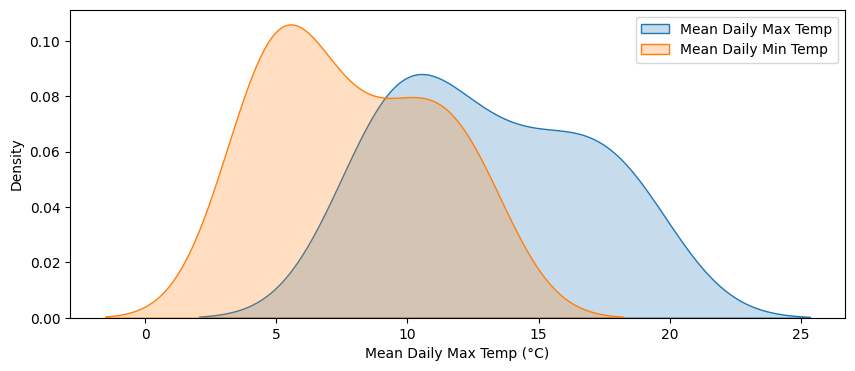

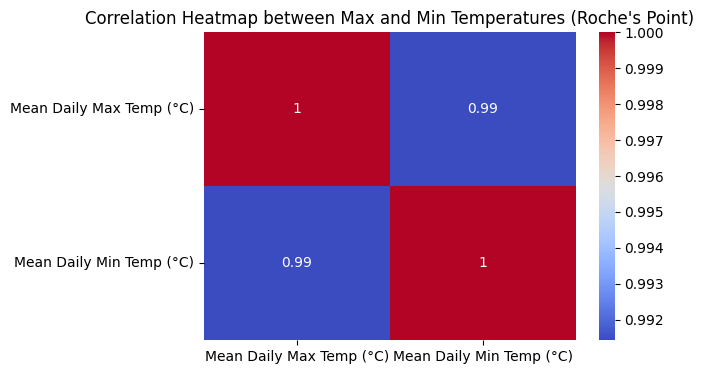

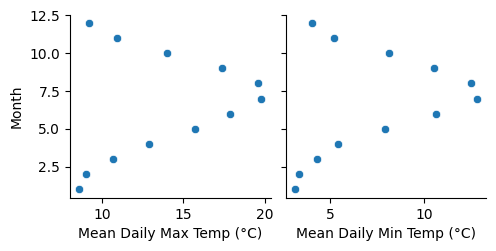

C:\Users\danie\AppData\Local\Temp\ipykernel_16696\2875590236.py:65: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(shannon_monthly_temps['Mean Daily Max Temp (°C)'], label='Mean Daily Max Temp', shade=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_16696\2875590236.py:66: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(shannon_monthly_temps['Mean Daily Min Temp (°C)'], label='Mean Daily Min Temp', shade=True)


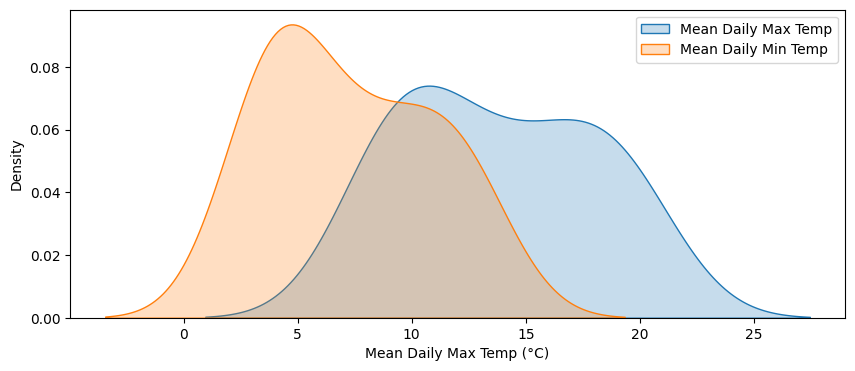

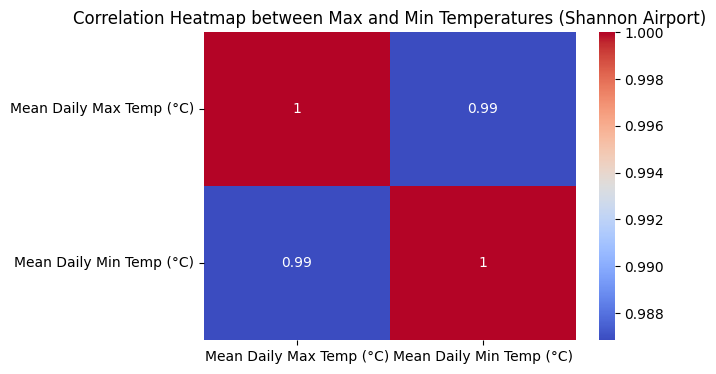

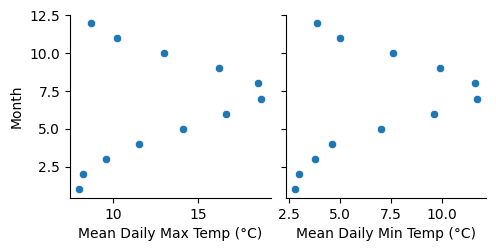

C:\Users\danie\AppData\Local\Temp\ipykernel_16696\2875590236.py:98: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cork_monthly_temps['Mean Daily Max Temp (°C)'], label='Mean Daily Max Temp', shade=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_16696\2875590236.py:99: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cork_monthly_temps['Mean Daily Min Temp (°C)'], label='Mean Daily Min Temp', shade=True)


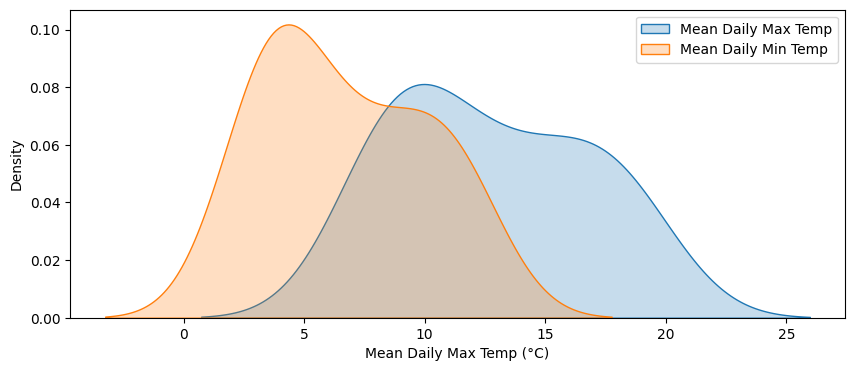

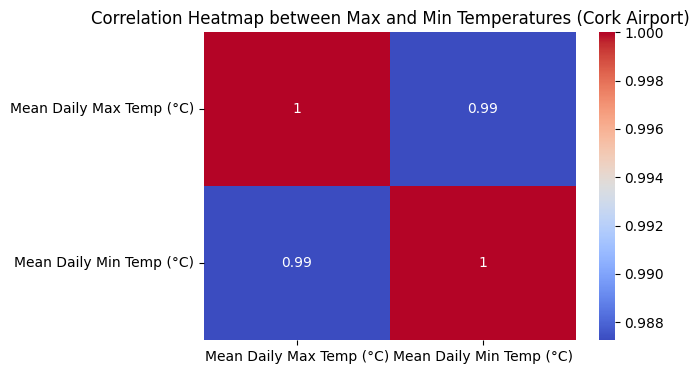

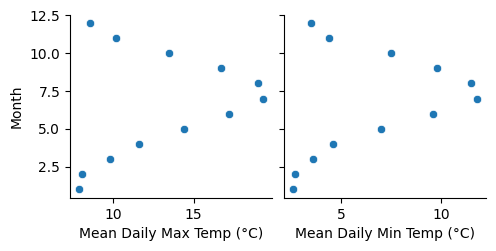

C:\Users\danie\AppData\Local\Temp\ipykernel_16696\2875590236.py:132: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dublin_monthly_temps['Mean Daily Max Temp (°C)'], label='Mean Daily Max Temp', shade=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_16696\2875590236.py:133: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dublin_monthly_temps['Mean Daily Min Temp (°C)'], label='Mean Daily Min Temp', shade=True)


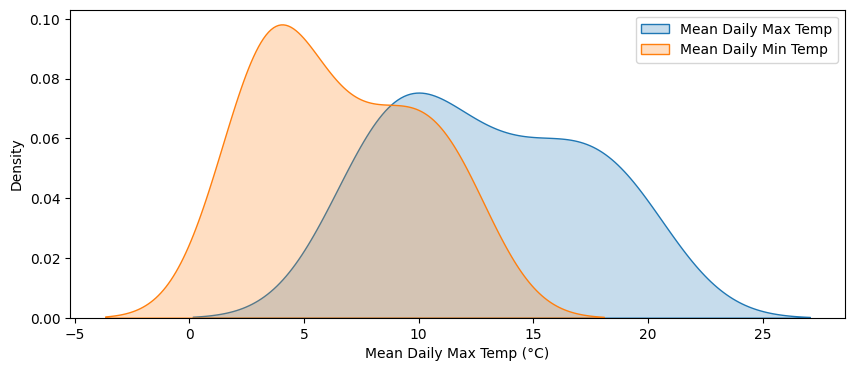

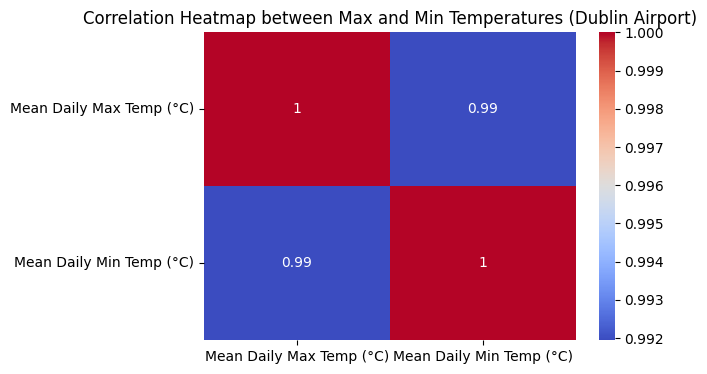

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

roche_weather_data = pd.read_csv("C:/Users/danie/Desktop/roches_point_climate_averages_1971_2000.csv")
shannon_weather_data = pd.read_csv("C:/Users/danie/Desktop/shannon_airport_climate_averages_1971_2000.csv")
cork_weather_data = pd.read_csv("C:/Users/danie/Desktop/cork_airport_climate_averages_1971_2000.csv")
dublin_weather_data = pd.read_csv("C:/Users/danie/Desktop/dublin_airport_climate_averages_1971_2000.csv")

# Data cleaning and preparation
# Extracting the relevant rows for mean daily max (maxtp) and mean daily min (mintp) temperatures
maxtp_roche = roche_weather_data.iloc[1, 1:-1].astype(float)  # Excluding the 'Year' column for monthly data
mintp_roche = roche_weather_data.iloc[2, 1:-1].astype(float)

# Calculate the mean daily max and mean daily min temperatures for the whole year
mean_maxtp_roche = maxtp_roche.mean()
mean_mintp_roche = mintp_roche.mean()

roche_monthly_temps = pd.DataFrame({
    'Month': range(1, 13),  # Months from January (1) to December (12)
    'Mean Daily Max Temp (°C)': maxtp_roche.values,
    'Mean Daily Min Temp (°C)': mintp_roche.values
})

# Seaborn pairplots for Dublin Airport data
sns.pairplot(roche_monthly_temps, x_vars=['Mean Daily Max Temp (°C)', 'Mean Daily Min Temp (°C)'], y_vars=['Month'])
plt.show()

# KDE plots for max and min temperatures
plt.figure(figsize=(10, 4))
sns.kdeplot(roche_monthly_temps['Mean Daily Max Temp (°C)'], label='Mean Daily Max Temp', shade=True)
sns.kdeplot(roche_monthly_temps['Mean Daily Min Temp (°C)'], label='Mean Daily Min Temp', shade=True)
plt.legend()
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(roche_monthly_temps[['Mean Daily Max Temp (°C)', 'Mean Daily Min Temp (°C)']].corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap between Max and Min Temperatures (Roche's Point)")
plt.show()

# Data cleaning and preparation
# Extracting the relevant rows for mean daily max (maxtp) and mean daily min (mintp) temperatures
maxtp_shannon = shannon_weather_data.iloc[1, 1:-1].astype(float)  # Excluding the 'Year' column for monthly data
mintp_shannon = shannon_weather_data.iloc[2, 1:-1].astype(float)

# Calculate the mean daily max and mean daily min temperatures for the whole year
mean_maxtp_shannon = maxtp_shannon.mean()
mean_mintp_shannon = mintp_shannon.mean()



shannon_monthly_temps = pd.DataFrame({
    'Month': range(1, 13),  # Months from January (1) to December (12)
    'Mean Daily Max Temp (°C)': maxtp_shannon.values,
    'Mean Daily Min Temp (°C)': mintp_shannon.values
})

# Seaborn pairplots for Dublin Airport data
sns.pairplot(shannon_monthly_temps, x_vars=['Mean Daily Max Temp (°C)', 'Mean Daily Min Temp (°C)'], y_vars=['Month'])
plt.show()

# KDE plots for max and min temperatures
plt.figure(figsize=(10, 4))
sns.kdeplot(shannon_monthly_temps['Mean Daily Max Temp (°C)'], label='Mean Daily Max Temp', shade=True)
sns.kdeplot(shannon_monthly_temps['Mean Daily Min Temp (°C)'], label='Mean Daily Min Temp', shade=True)
plt.legend()
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(shannon_monthly_temps[['Mean Daily Max Temp (°C)', 'Mean Daily Min Temp (°C)']].corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap between Max and Min Temperatures (Shannon Airport)")
plt.show()

# Data cleaning and preparation
# Extracting the relevant rows for mean daily max (maxtp) and mean daily min (mintp) temperatures
maxtp_cork = cork_weather_data.iloc[1, 1:-1].astype(float)  # Excluding the 'Year' column for monthly data
mintp_cork = cork_weather_data.iloc[2, 1:-1].astype(float)

# Calculate the mean daily max and mean daily min temperatures for the whole year
mean_maxtp_cork = maxtp_cork.mean()
mean_mintp_cork= mintp_cork.mean()


cork_monthly_temps = pd.DataFrame({
    'Month': range(1, 13),  # Months from January (1) to December (12)
    'Mean Daily Max Temp (°C)': maxtp_cork.values,
    'Mean Daily Min Temp (°C)': mintp_cork.values
})

# Seaborn pairplots for Dublin Airport data
sns.pairplot(cork_monthly_temps, x_vars=['Mean Daily Max Temp (°C)', 'Mean Daily Min Temp (°C)'], y_vars=['Month'])
plt.show()

# KDE plots for max and min temperatures
plt.figure(figsize=(10, 4))
sns.kdeplot(cork_monthly_temps['Mean Daily Max Temp (°C)'], label='Mean Daily Max Temp', shade=True)
sns.kdeplot(cork_monthly_temps['Mean Daily Min Temp (°C)'], label='Mean Daily Min Temp', shade=True)
plt.legend()
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cork_monthly_temps[['Mean Daily Max Temp (°C)', 'Mean Daily Min Temp (°C)']].corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap between Max and Min Temperatures (Cork Airport)")
plt.show()

# Data cleaning and preparation
# Extracting the relevant rows for mean daily max (maxtp) and mean daily min (mintp) temperatures
maxtp_dublin = dublin_weather_data.iloc[1, 1:-1].astype(float)  # Excluding the 'Year' column for monthly data
mintp_dublin = dublin_weather_data.iloc[2, 1:-1].astype(float)

# Calculate the mean daily max and mean daily min temperatures for the whole year
mean_maxtp_dublin = maxtp_dublin.mean()
mean_mintp_dublin = mintp_dublin.mean()

mean_maxtp_dublin, mean_mintp_dublin

dublin_monthly_temps = pd.DataFrame({
    'Month': range(1, 13),  # Months from January (1) to December (12)
    'Mean Daily Max Temp (°C)': maxtp_dublin.values,
    'Mean Daily Min Temp (°C)': mintp_dublin.values
})

# Seaborn pairplots for Dublin Airport data
sns.pairplot(dublin_monthly_temps, x_vars=['Mean Daily Max Temp (°C)', 'Mean Daily Min Temp (°C)'], y_vars=['Month'])
plt.show()

# KDE plots for max and min temperatures
plt.figure(figsize=(10, 4))
sns.kdeplot(dublin_monthly_temps['Mean Daily Max Temp (°C)'], label='Mean Daily Max Temp', shade=True)
sns.kdeplot(dublin_monthly_temps['Mean Daily Min Temp (°C)'], label='Mean Daily Min Temp', shade=True)
plt.legend()
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(dublin_monthly_temps[['Mean Daily Max Temp (°C)', 'Mean Daily Min Temp (°C)']].corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap between Max and Min Temperatures (Dublin Airport)")
plt.show()


# Comment:

## Very tight distribution between minimum and maximum temperatures for roche's point

## Reflected by 0.99 correlation in heatmap

## 0.1 of observations for minimum temperature are around 5 degrees, around 0.085 for about 9 degrees for maximum temperature celsius

## All of the rest of the data shows roughly similiar results

## We conclude that because these four weather stations are very close together (<200km apart) they have very similiar temperature patterns







In [4]:
# Comment We will now analyse the data using the pyod modules
## Scikit-learn has a KNN and Isolation Forest algorithm but we will also try the pyod versions


from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
import pandas as pd

# //////// ALGORITHMS //////// #

# Angle based outlier detector: Considers the relationship between each point and its neighbors. It calculates teh varaince
# of the weighted cosine of angles for pairs of points. An outlier has a different variance.

# Cluster-Based Local Outlier Factor: Points that belong to smaller clusters  and have a larger distance to the nearest
# large cluster are considered outliers


# Isolation forest:  Randomly select a feature and randomly select a quicksort-esque split value between minimum and maximum values
# of the seelcted feature. Isolating outlier observations is easier because only a few cases are needed to separate those cases frmo
# the normal observations.

# K-Nearest Neighbours: Essentially, the furthest variables frmo mean, largest and median are considered outliers

# Local outlier factor: Measures the local deviation of the density of a given data point with respect to its neighbors.
# Lower density than neighbors indicates an outlier

# One-Class SVM: Fits a hyperplane to separate the data into inliners and outliers

# Principal component analysis: Uses the sum of weighted projected distances to the eigenvector hyperplane as the outlier score.

# Why so many algorithms? The French weather data contains millions of lines of data, so it is ideal to find outliers using a variety of algorithms



# Comment: Due to the huge volume of data, the processing time for this algorithm proved to be very significant (>5 minutes)!



france_weather_data = pd.read_csv('C:/Users/danie/Desktop/NW2016.csv', skiprows=lambda i: i % 2 != 0)

france_weather_data['date'] = pd.to_datetime(france_weather_data['date'], format='%Y%m%d %H:%M')

# Select features for outlier detection
features = ['lat', 'lon', 'height_sta', 'dd', 'ff', 'precip', 'hu', 'td', 't', 'psl']
X = france_weather_data[features]
X = X.fillna(X.median())  # or X.dropna()


# Initialize and train the PyOD models
outlier_detectors = {
    'ABOD': ABOD(),
    'CBLOF': CBLOF(),
    'IForest': IForest(),
    'KNN': KNN(),
    'LOF': LOF(),
    'OCSVM': OCSVM(),
    'PCA': PCA()
}

# Dictionary to store the predictions
outliers = {}

for name, detector in outlier_detectors.items():
    detector.fit(X)
    # Get the prediction labels of the training data
    outliers[name] = detector.labels_

# To visualize the fraction of outliers detected by each model
outlier_fraction = {name: labels.sum()/len(labels) for name, labels in outliers.items()}
print(outlier_fraction)


for name in outlier_detectors.keys():
    # Create a DataFrame for the outliers
    outlier_data = france_weather_data.iloc[np.where(outliers[name] == 1)]
    print(f'Outliers detected by {name}:')
    print(outlier_data)
    print(f'Total number of outliers detected by {name}: {outlier_data.shape[0]}')
    print('\n')




Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\danie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
